In [1]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

2024-09-28 17:48:07.399597: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-28 17:48:07.412122: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-28 17:48:07.421368: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-28 17:48:07.424566: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-28 17:48:07.431879: I tensorflow/core/platform/cpu_feature_guar

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


I0000 00:00:1727513292.659323   24883 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1727513292.724786   24883 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1727513292.724838   24883 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
import re
import fasttext

# Îç∞Ïù¥ÌÑ∞ Ìò∏Ï∂ú Î∞è ÌååÏïÖ

In [19]:
df = pd.read_csv('./datasets/hate_speech_binary_dataset.csv', encoding='utf-8')
# df = df[['text', 'label']]
df = df.dropna()
df = df.reset_index(drop=True)
# df = df[['document', 'label']]
df.columns=['text','label']

In [20]:
df['label'].value_counts()

label
1    99996
0    89999
Name: count, dtype: int64

In [15]:
def replace_space(sentence):
    new = "".join(["" if ch == " " else ch for ch in sentence])
    return new

In [22]:
# df['text'] = df['text'].apply(replace_space)

In [23]:
df

text  label
0                                   Ï†ïÎßê Ïû¨Î∞åÎã§ Ïó∞Í∏∞ÎèÑ Ï¢ãÍ≥† ÎîîÏπ¥ÌîÑÎ¶¨Ïò§ Ïß±      1
1                         Ïã¨ÏøµÏã¨Ïøµ ÎØ∏ÏπòÎÑ§ÏöîÏù¥ÏàòÌòÅÎïúÏóê Ïû† Î™ªÏûêÍ≤†Ïñ¥Ïöî„Ö†ÏûêÍæ∏ ÏïÑÎ•∏Í±∞Î¶º„Ö†      1
2                               ÌïòÏßÄÎßå Ïù¥ÎãàÌõÑÎπ®Îü¨Îì§ÏùÄ Ïù¥Îü∞Í±∞ Í¥ÄÏã¨ ÌïòÎÇòÎèÑ ÏóÜÏùå      0
3                                       @Ï∞©ÌïúÏïÑÏù¥ÏûÑÎãπ A4 Ïö©ÏßÄ ÎçÆÍ≥†?      0
4       ÏßÑÏßú ÌèâÏ†ê ÎØøÏúºÎ©¥ ÏïàÎêú Îã§Îäî Í±∏ ÌòÑÏã§Î°ú Î≥¥Ïó¨Ï£ºÎäî ÏòÅÌôîÏûÖÎãàÎã§. ÎÑ§Ìã∞Ï¶å,Ï†ÑÎ¨∏Í∞Ä ÌïòÎÇòÍ∞ôÏù¥...      1
...                                                   ...    ...
189990  ÏõêÏûëÏùÑ ÏùΩÏùÑ Îïå Ïù¥Îü∞ Í±¥ Ï†àÎåÄ ÏòÅÏÉÅÌôîÌïòÍ∏∞ ÌûòÎì§Îã§Í≥† ÏÉùÍ∞ÅÌñàÎäîÎç∞ Î≤§ÌúòÏáºÏùò Ïó∞Í∏∞ÏôÄ ÎçîÎ∂àÏñ¥...      1
189991                                   ÏºÄÏÑùÎåÄ Ïñ¥Íπ® Ïò¨ÎùºÍ∞ÑÍ±∞Î¥êÎùº „Öã„Öã      0
189992  @ÍπÄÏßúÍæ∏ day and night\n\nround the clock\n\nwitho...      0
189993           Î°úÎ≤ÑÌä∏Îã§Ïö∞ÎãàÏ£ºÎãàÏñ¥Î•º Ï¢ãÏïÑÌï¥ÏÑú Î¥§ÎäîÎç∞ÎÑàÎ¨¥Ïû¨Î∞åÍ≤å Î¥§ÎçòÏòÅÌôîÏÉùÍ∞ÅÏóÜÏù¥ Î≥ºÎïå Îî±Ï¢ãÏùå      1
189994                         @ÏùµÎ™Ö_146173 Í∞úÏßÄÎûÑÎ≥ë Î≥ëÏã†Ï¢åÏ¢ÄÏÉàÎÅº„Öã„Öã„Öã„Öã      0

[189995 rows x 2 columns]

In [16]:
def is_only_dots(s):
    return all(char == '.' for char in s)

In [17]:
def is_only_space(s):
    return all(char == ' ' for char in s)

In [18]:
def is_only_space_hangul(s):
    return all(ord(char) == 12644 for char in s)

In [27]:
df.shape

(189995, 2)

In [28]:
# dotÎßå Ìè¨Ìï®ÌïòÎäî row
df = df[~df['text'].apply(is_only_dots)]

In [29]:
df.shape

(189923, 2)

In [30]:
df = df[~df['text'].apply(is_only_space)]

In [31]:
df.shape

(189923, 2)

In [32]:
df = df[~df['text'].apply(is_only_space_hangul)]

In [33]:
df.shape

(189922, 2)

In [34]:
df = df.reset_index(drop=True)

In [35]:
# ÌÖåÏä§Ìä∏Î•º ÏúÑÌï¥ 1ÎßåÍ∞úÎßå ÏÉòÌîåÎßÅ
# df = df.sample(n=len(df))
# df = df.reset_index(drop=True)
# df = df[:20000]

In [36]:
df.shape

(189922, 2)

In [37]:
df

text  label
0                                   Ï†ïÎßê Ïû¨Î∞åÎã§ Ïó∞Í∏∞ÎèÑ Ï¢ãÍ≥† ÎîîÏπ¥ÌîÑÎ¶¨Ïò§ Ïß±      1
1                         Ïã¨ÏøµÏã¨Ïøµ ÎØ∏ÏπòÎÑ§ÏöîÏù¥ÏàòÌòÅÎïúÏóê Ïû† Î™ªÏûêÍ≤†Ïñ¥Ïöî„Ö†ÏûêÍæ∏ ÏïÑÎ•∏Í±∞Î¶º„Ö†      1
2                               ÌïòÏßÄÎßå Ïù¥ÎãàÌõÑÎπ®Îü¨Îì§ÏùÄ Ïù¥Îü∞Í±∞ Í¥ÄÏã¨ ÌïòÎÇòÎèÑ ÏóÜÏùå      0
3                                       @Ï∞©ÌïúÏïÑÏù¥ÏûÑÎãπ A4 Ïö©ÏßÄ ÎçÆÍ≥†?      0
4       ÏßÑÏßú ÌèâÏ†ê ÎØøÏúºÎ©¥ ÏïàÎêú Îã§Îäî Í±∏ ÌòÑÏã§Î°ú Î≥¥Ïó¨Ï£ºÎäî ÏòÅÌôîÏûÖÎãàÎã§. ÎÑ§Ìã∞Ï¶å,Ï†ÑÎ¨∏Í∞Ä ÌïòÎÇòÍ∞ôÏù¥...      1
...                                                   ...    ...
189917  ÏõêÏûëÏùÑ ÏùΩÏùÑ Îïå Ïù¥Îü∞ Í±¥ Ï†àÎåÄ ÏòÅÏÉÅÌôîÌïòÍ∏∞ ÌûòÎì§Îã§Í≥† ÏÉùÍ∞ÅÌñàÎäîÎç∞ Î≤§ÌúòÏáºÏùò Ïó∞Í∏∞ÏôÄ ÎçîÎ∂àÏñ¥...      1
189918                                   ÏºÄÏÑùÎåÄ Ïñ¥Íπ® Ïò¨ÎùºÍ∞ÑÍ±∞Î¥êÎùº „Öã„Öã      0
189919  @ÍπÄÏßúÍæ∏ day and night\n\nround the clock\n\nwitho...      0
189920           Î°úÎ≤ÑÌä∏Îã§Ïö∞ÎãàÏ£ºÎãàÏñ¥Î•º Ï¢ãÏïÑÌï¥ÏÑú Î¥§ÎäîÎç∞ÎÑàÎ¨¥Ïû¨Î∞åÍ≤å Î¥§ÎçòÏòÅÌôîÏÉùÍ∞ÅÏóÜÏù¥ Î≥ºÎïå Îî±Ï¢ãÏùå      1
189921                         @ÏùµÎ™Ö_146173 Í∞úÏßÄÎûÑÎ≥ë Î≥ëÏã†Ï¢åÏ¢ÄÏÉàÎÅº„Öã„Öã„Öã„Öã      0

[189922 rows x 2 columns]

In [38]:
counts = df['label'].value_counts()
print(f'Normal speech counts :{counts[1]} ({counts[1]/len(df)*100:.2f}%)')
print(f'Hate speech counts :{counts[0]} ({counts[0]/len(df)*100:.2f}%)')

Normal speech counts :99930 (52.62%)
Hate speech counts :89992 (47.38%)


ÏµúÎåÄ Í∏∏Ïù¥ : 1735
ÏµúÏÜå Í∏∏Ïù¥ : 1
Î¶¨Î∑∞Ïùò ÌèâÍ∑† Í∏∏Ïù¥ : 38.86689798970104


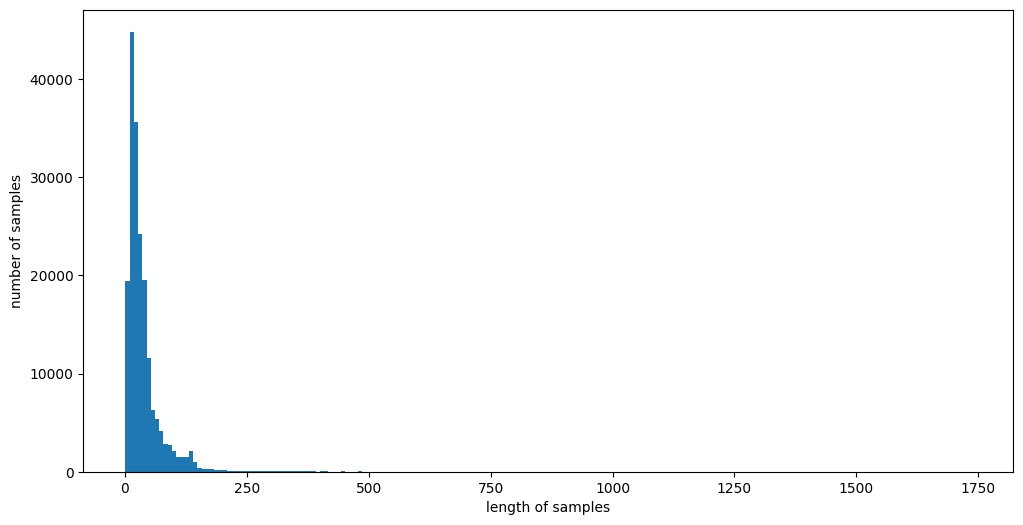

In [39]:
plt.figure(figsize=(12, 6))
print('ÏµúÎåÄ Í∏∏Ïù¥ :', max(len(text) for text in df['text']))
print('ÏµúÏÜå Í∏∏Ïù¥ :', min(len(text) for text in df['text']))
print('Î¶¨Î∑∞Ïùò ÌèâÍ∑† Í∏∏Ïù¥ :', sum(df['text'].str.len())/len(df))
plt.hist([len(text) for text in df['text']], bins=200)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [19]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('Ï†ÑÏ≤¥ ÏÉòÌîå Ï§ë Í∏∏Ïù¥Í∞Ä %s Ïù¥ÌïòÏù∏ ÏÉòÌîåÏùò ÎπÑÏú®: %s'%(max_len, (count / len(nested_list))*100))

In [41]:
threshold = 40

In [42]:
below_threshold_len(threshold, df['text'])

Ï†ÑÏ≤¥ ÏÉòÌîå Ï§ë Í∏∏Ïù¥Í∞Ä 40 Ïù¥ÌïòÏù∏ ÏÉòÌîåÏùò ÎπÑÏú®: 71.40773580733143


In [43]:
counts = df['label'].value_counts()
print(f'Normal speech counts :{counts[0]} ({counts[0]/len(df)*100:.2f}%)')
print(f'Hate speech counts :{counts[1]} ({counts[1]/len(df)*100:.2f}%)')

Normal speech counts :89992 (47.38%)
Hate speech counts :99930 (52.62%)


In [44]:
df

text  label
0                                   Ï†ïÎßê Ïû¨Î∞åÎã§ Ïó∞Í∏∞ÎèÑ Ï¢ãÍ≥† ÎîîÏπ¥ÌîÑÎ¶¨Ïò§ Ïß±      1
1                         Ïã¨ÏøµÏã¨Ïøµ ÎØ∏ÏπòÎÑ§ÏöîÏù¥ÏàòÌòÅÎïúÏóê Ïû† Î™ªÏûêÍ≤†Ïñ¥Ïöî„Ö†ÏûêÍæ∏ ÏïÑÎ•∏Í±∞Î¶º„Ö†      1
2                               ÌïòÏßÄÎßå Ïù¥ÎãàÌõÑÎπ®Îü¨Îì§ÏùÄ Ïù¥Îü∞Í±∞ Í¥ÄÏã¨ ÌïòÎÇòÎèÑ ÏóÜÏùå      0
3                                       @Ï∞©ÌïúÏïÑÏù¥ÏûÑÎãπ A4 Ïö©ÏßÄ ÎçÆÍ≥†?      0
4       ÏßÑÏßú ÌèâÏ†ê ÎØøÏúºÎ©¥ ÏïàÎêú Îã§Îäî Í±∏ ÌòÑÏã§Î°ú Î≥¥Ïó¨Ï£ºÎäî ÏòÅÌôîÏûÖÎãàÎã§. ÎÑ§Ìã∞Ï¶å,Ï†ÑÎ¨∏Í∞Ä ÌïòÎÇòÍ∞ôÏù¥...      1
...                                                   ...    ...
189917  ÏõêÏûëÏùÑ ÏùΩÏùÑ Îïå Ïù¥Îü∞ Í±¥ Ï†àÎåÄ ÏòÅÏÉÅÌôîÌïòÍ∏∞ ÌûòÎì§Îã§Í≥† ÏÉùÍ∞ÅÌñàÎäîÎç∞ Î≤§ÌúòÏáºÏùò Ïó∞Í∏∞ÏôÄ ÎçîÎ∂àÏñ¥...      1
189918                                   ÏºÄÏÑùÎåÄ Ïñ¥Íπ® Ïò¨ÎùºÍ∞ÑÍ±∞Î¥êÎùº „Öã„Öã      0
189919  @ÍπÄÏßúÍæ∏ day and night\n\nround the clock\n\nwitho...      0
189920           Î°úÎ≤ÑÌä∏Îã§Ïö∞ÎãàÏ£ºÎãàÏñ¥Î•º Ï¢ãÏïÑÌï¥ÏÑú Î¥§ÎäîÎç∞ÎÑàÎ¨¥Ïû¨Î∞åÍ≤å Î¥§ÎçòÏòÅÌôîÏÉùÍ∞ÅÏóÜÏù¥ Î≥ºÎïå Îî±Ï¢ãÏùå      1
189921                         @ÏùµÎ™Ö_146173 Í∞úÏßÄÎûÑÎ≥ë Î≥ëÏã†Ï¢åÏ¢ÄÏÉàÎÅº„Öã„Öã„Öã„Öã      0

[189922 rows x 2 columns]

In [45]:
df.shape

(189922, 2)

# Ïù¥ÎØ∏ÏßÄÌôî

In [20]:
# Ïù¥ÎØ∏ÏßÄÎ°ú Î≥ÄÌôòÌïòÎäî Ìï®Ïàò
def create_sentence_image(sentence, font_path, font_size, background_color=(0, 0, 0), text_color=(255, 255, 255)):
  sentence_split = sentence.split('\n')
  width = len(max(sentence_split, key=len)) # Í∏∏Ïù¥Í∞Ä Í∞ÄÏû• Í∏¥ Î¶¨Ïä§Ìä∏Ïùò Í∏∏Ïù¥Î°ú ÎÑàÎπÑ Í≤∞Ï†ï
  height = len(sentence_split) # Í∞úÌñâÏúºÎ°ú ÎÇòÎà†ÏßÑ Î¶¨Ïä§Ìä∏Ïùò Í∏∏Ïù¥Î°ú ÎÜíÏù¥ Í≤∞Ï†ï

  image_width, image_height = (width*16), height*24  # ÌîΩÏÖÄ ÏÇ¨Ïù¥Ï¶à Ï°∞Ï†ï
  image = Image.new('RGB', (image_width, image_height), background_color)
  draw = ImageDraw.Draw(image)

  # Ìè∞Ìä∏ Ìò∏Ï∂ú
  font = ImageFont.truetype(font_path, font_size)

  # Get the text size
  # text_width, text_height = draw.textlength(sentence, font=font)
  _, _, text_width, text_height = draw.textbbox((0, 0), sentence, font=font)

  # Calculate the position to center the text
  x = (image_width - text_width) // 2
  y = (image_height - text_height) // 2

  # Draw the letter on the image
  draw.text((x, y), sentence, font=font, fill=text_color)

  # Convert image to numpy array
  img_array = np.array(image)

  # Find the bounding box of non-background pixels
  non_background = np.where(img_array != background_color)
  top, left = np.min(non_background[0]), np.min(non_background[1])
  bottom, right = np.max(non_background[0]), np.max(non_background[1])

  # Crop the image
  cropped_image = image.crop((left, top, right+1, bottom+1))

  return cropped_image

In [47]:
# # Ïù¥ÎØ∏ÏßÄ ÏÇ¨Ïù¥Ï¶à Ï°∞Ï†à. resize
# def resize_image(img):
#   resized_img = img.resize((32,32))
#   return resized_img

In [35]:
# Ìè∞Ìä∏ ÏÑ§Ï†ï
font_path = "./utils/arial-unicode.ttf"
font_size = 12

In [49]:
text = "ÏïàÎÖïÌïòÏÑ∏Ïöî???? ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏûÖÎãàÎã§............."
sample = replace_space(text)
img = create_sentence_image(str(sample), font_path, font_size)
display(img)
img = np.array(img)

In [50]:
print(f"Y axis max value: {img.shape[0]}")
print(f"X axis max value: {img.shape[1]}")

Y axis max value: 11
X axis max value: 237


In [51]:
# print(np.array(resized_img).shape)

# coordinates Ï∂îÏ∂ú

In [21]:
# convert image into coordinates
def get_coordinates(img):
  img_arr = np.array(img)
  coordinates = []
  for x in range(len(img_arr)):
    for y in range(len(img_arr[x])):
      if max(img_arr[x][y]) != 0:
        coordinates.append([y,x])
  return np.array(coordinates)

In [22]:
def extract_x_y(img_arr, coordinates):
  # x = np.array([point[0] for point in coordinates]) / len(img_arr[0])
  # y = np.array([point[1] for point in coordinates]) / len(img_arr)
  x = np.array([point[0] for point in coordinates])
  y = np.array([point[1] for point in coordinates])
  # y = 1-y
  return x, y

In [23]:
def draw_text(x, y):
  # plotting
  plt.scatter(x, y, color='blue')

  # Set plot title and labels
  plt.title('Coordinates for Sentence')
  plt.xlabel('X-axis')
  plt.ylabel('Y-axis')

  # Display plot
  plt.show()

In [55]:
coordinates = get_coordinates(img)

In [56]:
coordinates.shape

(965, 2)

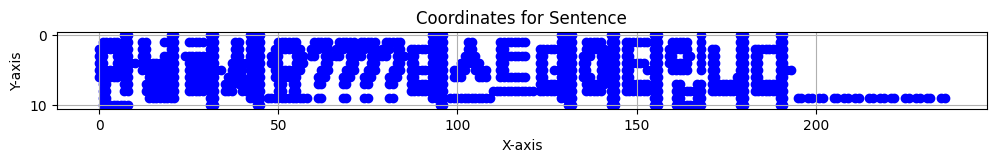

In [57]:
# plotting
import matplotlib.pyplot as plt

x, y = extract_x_y(img, coordinates)

plt.figure(figsize=(12, 1))
plt.scatter(x, y, color='blue')

# Set plot title and labels
plt.title('Coordinates for Sentence')
plt.gca().invert_yaxis()
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)  # Í∑∏Î¶¨Îìú Ï∂îÍ∞Ä

# Display plot
plt.show()

# Ï¢åÌëúÍ∞í Ï†ïÍ∑úÌôî

In [24]:
def std_coordinates(data, max_x, max_y):
    standardized_data = np.zeros_like(data, dtype=float)
    standardized_data[:, 0] = data[:, 0] / max_x
    standardized_data[:, 1] = data[:, 1] / max_y
    return standardized_data

In [59]:
coordinates[300]

array([130,   3])

In [60]:
img.shape

(11, 237, 3)

In [61]:
std_coords = std_coordinates(coordinates, img.shape[1], img.shape[0])

In [62]:
std_coords.shape

(965, 2)

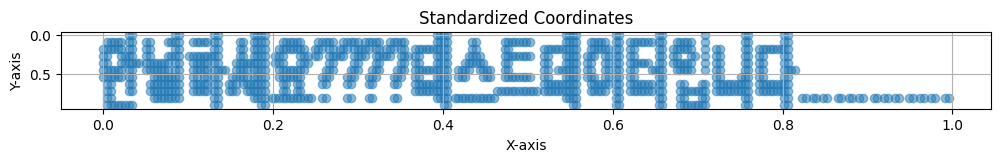

In [63]:
# ÏÇ∞Ï†êÎèÑ Í∑∏Î¶¨Í∏∞
plt.figure(figsize=(12, 1))
plt.scatter(std_coords[:, 0], std_coords[:, 1], alpha=0.5)
plt.title('Standardized Coordinates')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.gca().invert_yaxis()
# plt.xlim(0, 1)  # xÏ∂ï Î≤îÏúÑÎ•º 0ÏóêÏÑú 1Î°ú ÏÑ§Ï†ï
# plt.ylim(0, 1)  # yÏ∂ï Î≤îÏúÑÎ•º 0ÏóêÏÑú 1Î°ú ÏÑ§Ï†ï
plt.grid(True)  # Í∑∏Î¶¨Îìú Ï∂îÍ∞Ä

# ÌîåÎ°Ø ÌëúÏãú
plt.show()

In [25]:
# Ìå®Îî©
def pad_coords(coords, pad_size=3000):
    sorted_data = coords[coords[:, 0].argsort()]
    if len(sorted_data) >= pad_size:
        return sorted_data[:pad_size]
    else:
        diff = pad_size - len(sorted_data)
        sorted_data = np.pad(sorted_data, ((0, diff), (0, 0)), mode='constant', constant_values=0)
    return sorted_data

In [65]:
padded_coords = pad_coords(std_coords)

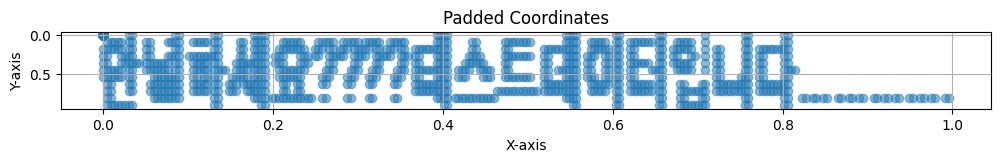

In [66]:
# ÏÇ∞Ï†êÎèÑ Í∑∏Î¶¨Í∏∞
plt.figure(figsize=(12, 1))
plt.scatter(padded_coords[:, 0], padded_coords[:, 1], alpha=0.5)
plt.title('Padded Coordinates')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.gca().invert_yaxis()
# plt.xlim(0, 1)  # xÏ∂ï Î≤îÏúÑÎ•º 0ÏóêÏÑú 1Î°ú ÏÑ§Ï†ï
# plt.ylim(0, 1)  # yÏ∂ï Î≤îÏúÑÎ•º 0ÏóêÏÑú 1Î°ú ÏÑ§Ï†ï
plt.grid(True)  # Í∑∏Î¶¨Îìú Ï∂îÍ∞Ä

# ÌîåÎ°Ø ÌëúÏãú
plt.show()

# Ï†ÑÏ≤òÎ¶¨

In [26]:
# stopwords Ìò∏Ï∂ú
with open('./datasets/stopwords.txt', 'r') as f:
    lines = f.readlines()

# lines = [line.strip() for line in lines]
stopwords = list([line.strip() for line in lines if line != ""][1:])

In [27]:
# fasttext Î™®Îç∏ load
fasttext_model = fasttext.load_model("fasttext_jamo_model.bin")

In [28]:
from jamo import h2j, j2hcj
from konlpy.tag import Okt
okt = Okt()

In [29]:
def vectorize_text(morph_list, model):
    vectors = []
    for i in range(len(morph_list)):
        vectors.append(model[morph_list[i]])
    return vectors

In [30]:
# Ï†ïÍ∑úÏãù Ìå®ÌÑ¥: Í∞ôÏùÄ Î¨∏ÏûêÍ∞Ä 3Î≤à Ïù¥ÏÉÅ Î∞òÎ≥µÎêòÎäî Í≤ΩÏö∞
def reduce_repeated_chars(s):
    pattern = r'(.)\1{2,}'
    return re.sub(pattern, r'\1\1\1', s)

In [31]:
def get_jamo(s):
    reduced_char = reduce_repeated_chars(s)
    words = okt.morphs(reduced_char, norm=True)
    processed_words = [word for word in words if word not in stopwords]
    jamo_list = [j2hcj(h2j(word)) for word in processed_words]
    return jamo_list

In [14]:
s = 'Ïû¨Î∞åÎã§ „Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã „Ñ±\-„Öà\- test..... !+ ÌÖåÏä§Ìä∏Îãπ ÏïÑ'
s = reduce_repeated_chars(s)
s = okt.morphs(s, norm=True)
s

<>:1: SyntaxWarning: invalid escape sequence '\-'
<>:1: SyntaxWarning: invalid escape sequence '\-'
/tmp/ipykernel_24883/3797488092.py:1: SyntaxWarning: invalid escape sequence '\-'
  s = 'Ïû¨Î∞åÎã§ „Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã „Ñ±\-„Öà\- test..... !+ ÌÖåÏä§Ìä∏Îãπ ÏïÑ'
/tmp/ipykernel_24883/3797488092.py:1: SyntaxWarning: invalid escape sequence '\-'
  s = 'Ïû¨Î∞åÎã§ „Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã „Ñ±\-„Öà\- test..... !+ ÌÖåÏä§Ìä∏Îãπ ÏïÑ'


NameError: name 'reduce_repeated_chars' is not defined

In [74]:
s = 'Ïû¨Î∞åÎã§ „Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã „Ñ±\-„Öà\- test..... !+ ÌÖåÏä§Ìä∏Îãπ ÏïÑ'
get_jamo(s)

<>:1: SyntaxWarning: invalid escape sequence '\-'
<>:1: SyntaxWarning: invalid escape sequence '\-'
/tmp/ipykernel_22151/3188698262.py:1: SyntaxWarning: invalid escape sequence '\-'
  s = 'Ïû¨Î∞åÎã§ „Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã „Ñ±\-„Öà\- test..... !+ ÌÖåÏä§Ìä∏Îãπ ÏïÑ'


['„Öà„Öê„ÖÅ„Ö£„ÖÜ„Ñ∑„Öè',
 '„Öã„Öã„Öã',
 '„Ñ±',
 '\\-',
 '„Öà',
 '\\-',
 'test',
 '...',
 '!+',
 '„Öå„Öî„ÖÖ„Ö°„Öå„Ö°',
 '„Ñ∑„Öè„Öá']

In [75]:
s = 'Ïû¨Î∞åÎã§ „Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã „Ñ±\-„Öà\- test..... !+ ÌÖåÏä§Ìä∏Îãπ ÏïÑ'
replace_space(s)

<>:1: SyntaxWarning: invalid escape sequence '\-'
<>:1: SyntaxWarning: invalid escape sequence '\-'
/tmp/ipykernel_22151/2800769426.py:1: SyntaxWarning: invalid escape sequence '\-'
  s = 'Ïû¨Î∞åÎã§ „Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã „Ñ±\-„Öà\- test..... !+ ÌÖåÏä§Ìä∏Îãπ ÏïÑ'


'Ïû¨Î∞åÎã§„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Ñ±\\-„Öà\\-test.....!+ÌÖåÏä§Ìä∏ÎãπÏïÑ'

In [76]:
test = vectorize_text(get_jamo('ÏïàÎÖï? „Öé„Öé ÏÇ¨ÎûëÌï¥'), fasttext_model)

In [77]:
get_jamo("ÏÇ¨ÎûëÌï¥")

['„ÖÖ„Öè„Ñπ„Öè„Öá', '„Öé„Öê']

In [78]:
np.array(test[0]).shape

(100,)

In [79]:
test[-1] == fasttext_model['„Öé„Öê']

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [38]:
pad_size = 3000

In [77]:
vector_data = []
coords_data = []
# img_data = []
coords_by_length = []
label_list = []

for i in range(len(df)):
    text = df['text'][i]
    processed_text = get_jamo(text)
    vector_list = vectorize_text(processed_text, fasttext_model)
    if len(vector_list) == 0:
        continue
    else:
        vector_data.append(vector_list)
        # spaceless_text = replace_space(text)
        spaceless_text = replace_space(" ".join(processed_text))
        img = create_sentence_image(spaceless_text, font_path, font_size)
        # resized_img = resize_image(img)
        # img_data.append(resized_img)
        img = np.array(img)
        
        # Ï¢åÌëú Ï∂îÏ∂ú
        coordinates = get_coordinates(img)
        
        x_lim = img.shape[1]
        y_lim = img.shape[0]
        
        # Ï¢åÌëú Ï†ïÍ∑úÌôî
        std_coords = std_coordinates(coordinates, x_lim, y_lim)
        coords_by_length.append(std_coords.shape[0])
        padded_coords = pad_coords(std_coords, pad_size)
    
        coords_data.append(padded_coords)
        label_list.append(df['label'][i])

    if i % 1000 == 0:
        print(i)
    
print("Preprocess complete")
print(len(coords_data))

0


KeyboardInterrupt: 

In [4]:
# load processed data
padded_vector_data = np.load('./datasets/padded_vector_data_hate.npy')
coords_data = np.load('./datasets/coords_data_hate.npy')
label_list = np.load('./datasets/label_list_hate.npy')

In [82]:
df['text'][1]

'Ïã¨ÏøµÏã¨Ïøµ ÎØ∏ÏπòÎÑ§ÏöîÏù¥ÏàòÌòÅÎïúÏóê Ïû† Î™ªÏûêÍ≤†Ïñ¥Ïöî„Ö†ÏûêÍæ∏ ÏïÑÎ•∏Í±∞Î¶º„Ö†'

In [83]:
# display(img_data[0])

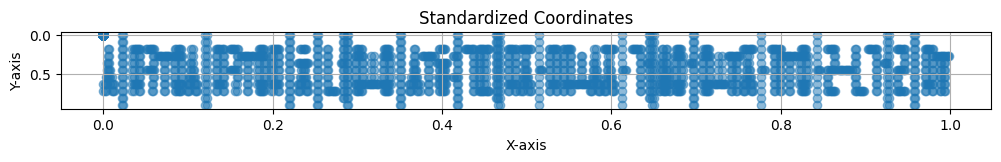

In [84]:
plt.figure(figsize=(12, 1))
plt.scatter(coords_data[1][:, 0], coords_data[1][:, 1], alpha=0.5)
plt.title('Standardized Coordinates')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.gca().invert_yaxis()
# plt.xlim(0, 1)
# plt.ylim(0, 1)
plt.grid(True)

# ÌîåÎ°Ø ÌëúÏãú
plt.show()

In [82]:
# coords ÌèâÍ∑† Í∏∏Ïù¥
max_len = max(i for i in coords_by_length)
min_len = min(i for i in coords_by_length)
average = sum(i for i in coords_by_length) / len(coords_by_length)

print("max length: ", max_len)
print("min length: ", min_len)
print("avg length: ", average)

NameError: name 'coords_by_length' is not defined

In [83]:
# vector ÌèâÍ∑† Í∏∏Ïù¥
vec_max_len = max(len(i) for i in vector_data)
vec_min_len = min(len(i) for i in vector_data)
vec_average = sum(len(i) for i in vector_data) / len(vector_data)

print("max length: ", vec_max_len)
print("min length: ", vec_min_len)
print("avg length: ", vec_average)

NameError: name 'vector_data' is not defined

# Ï†ïÍ∑úÌôî

In [32]:
# vector Ìå®Îî©
def pad_vector(vec, pad_size=30):
    padded = []
    if len(vec) >= pad_size:
        return np.array(vec[:pad_size])
    else:
        diff = pad_size - len(vec)
        padded = np.pad(vec, ((0, diff), (0, 0)), mode='constant', constant_values=0)
    return np.array(padded)

In [85]:
pad_vector(vector_data[0],50).shape

NameError: name 'vector_data' is not defined

In [82]:
# Î≤°ÌÑ∞ Ï†úÎ°úÌå®Îî©
padded_vector_data = []
for i in range(len(vector_data)):
    padded_vector_data.append(pad_vector(vector_data[i], 30))
padded_vector_data = np.array(padded_vector_data)

In [83]:
len(vector_data)

1

In [84]:
len(coords_data)

0

In [85]:
padded_vector_data.shape

(1, 30, 100)

In [ ]:
# # save processed data
# np.save('./datasets/padded_vector_data_hate.npy', np.array(padded_vector_data))
# np.save('./datasets/coords_data_hate.npy', np.array(coords_data))
# np.save('./datasets/label_list_hate.npy', np.array(label_list))

# Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†

In [5]:
# # Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
x_train = padded_vector_data[:152000]
x_train_coords = np.array(coords_data)[:152000]
# x_train_img = np.array(img_data)[:40000]
y_train = np.array(label_list)[:152000]

x_test = padded_vector_data[152000:]
x_test_coords = np.array(coords_data)[152000:]
# x_test_img = np.array(img_data)[40000:]
y_test = np.array(label_list)[152000:]

print(x_train.shape)
print(x_train_coords.shape)
# print(x_train_img.shape)
print(y_train.shape)
print(x_test.shape)
print(x_test_coords.shape)
# print(x_test_img.shape)
print(y_test.shape)

(152000, 30, 100)
(152000, 3000, 2)
(152000,)
(37859, 30, 100)
(37859, 3000, 2)
(37859,)


# Î™®Îç∏ ÏÑ§Í≥Ñ

In [6]:
import tensorflow.keras.layers
from tensorflow.keras.layers import Input, Conv2D, Conv1D, Flatten, Dense, Concatenate, MaxPool2D, MaxPool1D, Dropout, LSTM, Embedding
from tensorflow.keras.models import Model, Sequential

In [7]:
# # Î≤°ÌÑ∞ ÏûÖÎ†•
# vector_input = Input(shape=(30, 100))
# x1 = LSTM(128, activation='relu')(vector_input)
# x1 = Flatten()(x1)

# # Í∏ÄÏûê Ï¢åÌëú ÏûÖÎ†•
# coords_input = Input(shape=(3000,2))
# x2 = Dense(512, activation='relu')(coords_input)
# x2 = Dense(128, activation='relu')(x2)
# x2 = Flatten()(x2)  # Flatten the output of Dense layer

# # Í≤∞Ìï©
# combined = Concatenate()([x1, x2])
# x3 = Dense(64, activation='relu')(combined)
# x3 = Dense(32, activation='relu')(x3)
# output = Dense(1, activation='sigmoid')(x3)

# # Î™®Îç∏ Ï†ïÏùò
# model = Model(inputs=[vector_input, coords_input], outputs=output) --- 84.92 acc


# Î≤°ÌÑ∞ ÏûÖÎ†•
vector_input = Input(shape=(30, 100))
x1 = LSTM(64, activation='relu')(vector_input)
x1 = Flatten()(x1)

# Í∏ÄÏûê Ï¢åÌëú ÏûÖÎ†•
coords_input = Input(shape=(3000,2))
x2 = Dense(512, activation='relu')(coords_input)
x2 = Dense(128, activation='relu')(x2)
x2 = Flatten()(x2)  # Flatten the output of Dense layer

# Í≤∞Ìï©
combined = Concatenate()([x1, x2])
x3 = Dense(64, activation='relu')(combined)
x3 = Dense(32, activation='relu')(x3)
output = Dense(1, activation='sigmoid')(x3)

# Î™®Îç∏ Ï†ïÏùò
model = Model(inputs=[vector_input, coords_input], outputs=output)

I0000 00:00:1727513349.663788   24883 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1727513349.663898   24883 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1727513349.663915   24883 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1727513349.837059   24883 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1727513349.837132   24883 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-09-28

In [92]:
# Ï¢åÌëúÎßå
# Í∏ÄÏûê Ï¢åÌëú ÏûÖÎ†•
coords_input = Input(shape=(3000,2))
x1 = Dense(512, activation='relu')(coords_input)
x1 = Dense(128, activation='relu')(x1)
x1 = Flatten()(x1)
x1 = Dense(64, activation='relu')(x1)
x1 = Dense(32, activation='relu')(x1)
output = Dense(1, activation='sigmoid')(x1)

# Î™®Îç∏ Ï†ïÏùò
model = Model(inputs=coords_input, outputs=output)

In [148]:
model = Sequential([
    LSTM(128, input_shape=(30, 100)),
    Dense(1, activation='sigmoid')
])

/home/sdm/miniconda3/envs/dl/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [30]:
# LSTM, CNN
vector_input = Input(shape=(30, 100))
x1 = LSTM(128, activation='relu')(vector_input)

# Í≤∞Ìï©
coords_input = Input(shape=(3000, 2))
x2 = Conv1D(64, 3, activation='relu')(coords_input)
x2 = MaxPool1D()(x2)
x2 = Dropout(0.25)(x2)
x2 = Conv1D(32, 3, activation='relu')(x2)
x2 = MaxPool1D()(x2)
x2 = Flatten()(x2)

# Í≤∞Ìï©
combined = Concatenate()([x1, x2])
x3 = Dense(512, activation='relu')(combined)
x3 = Dropout(0.25)(x3)
output = Dense(1, activation='sigmoid')(x3)

# Î™®Îç∏ Ï†ïÏùò
model = Model(inputs=[vector_input, coords_input], outputs=output)

In [8]:
model.summary()

Model: "functional"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)        ‚îÉ Output Shape      ‚îÉ    Param # ‚îÉ Connected to      ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ input_layer_1       ‚îÇ (None, 3000, 2)   ‚îÇ          0 ‚îÇ -                 ‚îÇ
‚îÇ (InputLayer)        ‚îÇ                   ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ input_layer         ‚îÇ (None, 30, 100)   ‚îÇ          0 ‚îÇ -                 ‚îÇ
‚îÇ (InputLayer)        ‚îÇ                   ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense (Dense)       ‚îÇ (None, 3000, 512) ‚îÇ      1,536 ‚îÇ input_layer_1[0]‚Ä¶ ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ lstm (LSTM)         ‚îÇ (None, 64)        ‚îÇ     42,240 ‚îÇ input_layer[0][0] ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_1 (Dense)     ‚îÇ (None, 3000, 128) ‚îÇ     65,664 ‚îÇ dense[0][0]       ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ flatten (Flatten)   ‚îÇ (None, 64)        ‚îÇ          0 ‚îÇ lstm[0][0]        ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ flatten_1 (Flatten) ‚îÇ (None, 384000)    ‚îÇ          0 ‚îÇ dense_1[0][0]     ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ concatenate         ‚îÇ (None, 384064)    ‚îÇ          0 ‚îÇ flatten[0][0],    ‚îÇ
‚îÇ (Concatenate)       ‚îÇ                   ‚îÇ            ‚îÇ flatten_1[0][0]   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_2 (Dense)     ‚îÇ (None, 64)        ‚îÇ 24,580,160 ‚îÇ concatenate[0][0] ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_3 (Dense)     ‚îÇ (None, 32)        ‚îÇ      2,080 ‚îÇ dense_2[0][0]     ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_4 (Dense)     ‚îÇ (Non

 Total params: 24,691,713 (94.19 MB)

 Trainable params: 24,691,713 (94.19 MB)

 Non-trainable params: 0 (0.00 B)

In [133]:
model.summary()

Model: "sequential"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ lstm_1 (LSTM)                   ‚îÇ (None, 128)            ‚îÇ       117,248 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_5 (Dense)                 ‚îÇ (None, 1)              ‚îÇ           129 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 117,377 (458.50 KB)

 Trainable params: 117,377 (458.50 KB)

 Non-trainable params: 0 (0.00 B)

In [93]:
model.summary()

Model: "functional_2"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ input_layer_2 (InputLayer)      ‚îÇ (None, 3000, 2)        ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_10 (Dense)                ‚îÇ (None, 3000, 512)      ‚îÇ         1,536 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_11 (Dense)                ‚îÇ (None, 3000, 128)      ‚îÇ        65,664 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ flatten_1 (Flatten)             ‚îÇ (None, 384000)         ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_12 (Dense)                ‚îÇ (None, 64)             ‚îÇ    24,576,064 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_13 (Dense)                ‚îÇ (None, 32)             ‚îÇ         2,080 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_14 (Dense)                ‚îÇ (None, 1)              ‚îÇ            33 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 24,645,377 (94.01 MB)

 Trainable params: 24,645,377 (94.01 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
# LSTM, CNN
model.summary()

Model: "functional_7"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)        ‚îÉ Output Shape      ‚îÉ    Param # ‚îÉ Connected to      ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ input_layer_23      ‚îÇ (None, 3000, 2)   ‚îÇ          0 ‚îÇ -                 ‚îÇ
‚îÇ (InputLayer)        ‚îÇ                   ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv1d_17 (Conv1D)  ‚îÇ (None, 2998, 64)  ‚îÇ        448 ‚îÇ input_layer_23[0‚Ä¶ ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling1d_15    ‚îÇ (None, 1499, 64)  ‚îÇ          0 ‚îÇ conv1d_17[0][0]   ‚îÇ
‚îÇ (MaxPooling1D)      ‚îÇ                   ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_5 (Dropout) ‚îÇ (None, 1499, 64)  ‚îÇ          0 ‚îÇ max_pooling1d_15‚Ä¶ ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv1d_18 (Conv1D)  ‚îÇ (None, 1497, 32)  ‚îÇ      6,176 ‚îÇ dropout_5[0][0]   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ input_layer_22      ‚îÇ (None, 30, 100)   ‚îÇ          0 ‚îÇ -                 ‚îÇ
‚îÇ (InputLayer)        ‚îÇ                   ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling1d_16    ‚îÇ (None, 748, 32)   ‚îÇ          0 ‚îÇ conv1d_18[0][0]   ‚îÇ
‚îÇ (MaxPooling1D)      ‚îÇ                   ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ lstm_11 (LSTM)      ‚îÇ (None, 128)       ‚îÇ    117,248 ‚îÇ input_layer_22[0‚Ä¶ ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ flatten_10          ‚îÇ (None, 23936)     ‚îÇ          0 ‚îÇ max_pooling1d_16‚Ä¶ ‚îÇ
‚îÇ (Flatten)           ‚îÇ                   ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ concatenate_9       ‚îÇ (None, 24064)     ‚îÇ          0 ‚îÇ lstm_11[0][0],    ‚îÇ
‚îÇ (Concatenate)       ‚îÇ                   ‚îÇ            ‚îÇ flatten_10[0][0]

 Total params: 12,445,665 (47.48 MB)

 Trainable params: 12,445,665 (47.48 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
batch_size = 128
epochs = 5

# Train the model
history = model.fit([x_train, x_train_coords], y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/5


I0000 00:00:1727513369.675496   25092 service.cc:146] XLA service 0x7f9b5000c3e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1727513369.675559   25092 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 4090, Compute Capability 8.9
2024-09-28 17:49:29.728150: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-09-28 17:49:29.975494: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8902
2024-09-28 17:49:30.949350: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1', 12 bytes spill stores, 12 bytes spill loads

2024-09-28 17:49:31.236014: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 

   8/1069 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 17s 16ms/step - accuracy: 0.4974 - loss: 0.8068

I0000 00:00:1727513372.861028   25092 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1068/1069 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 16ms/step - accuracy: 0.8518 - loss: 0.3367

2024-09-28 17:49:50.109873: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1', 12 bytes spill stores, 12 bytes spill loads

2024-09-28 17:49:50.293243: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1', 324 bytes spill stores, 272 bytes spill loads

2024-09-28 17:49:50.349628: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_12', 148 bytes spill stores, 148 bytes spill loads

2024-09-28 17:49:50.537624: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_12', 212 bytes spill stores, 200 bytes spill loads



1069/1069 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 25s 19ms/step - accuracy: 0.8518 - loss: 0.3366 - val_accuracy: 0.9067 - val_loss: 0.2260
Epoch 2/5
1069/1069 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 20s 19ms/step - accuracy: 0.9206 - loss: 0.1963 - val_accuracy: 0.9433 - val_loss: 0.1455
Epoch 3/5
1069/1069 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 17s 16ms/step - accuracy: 0.9446 - loss: 0.1377 - val_accuracy: 0.9461 - val_loss: 0.1400
Epoch 4/5
1069/1069 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 20s 19ms/step - accuracy: 0.9508 - loss: 0.1263 - val_accuracy: 0.9480 - val_loss: 0.1305
Epoch 5/5
1069/1069 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 17s 16ms/step - accuracy: 0.9563 - loss: 0.1112 - val_accuracy: 0.9466 - val_loss: 0.1338


In [150]:
# LSTM model
batch_size = 128
epochs = 5

# Train the model
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/5
1069/1069 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7s 5ms/step - accuracy: 0.9279 - loss: 0.1898 - val_accuracy: 0.9488 - val_loss: 0.1289
Epoch 2/5
1069/1069 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 5ms/step - accuracy: 0.9521 - loss: 0.1217 - val_accuracy: 0.9530 - val_loss: 0.1231
Epoch 3/5
1069/1069 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 4ms/step - accuracy: 0.9569 - loss: 0.1089 - val_accuracy: 0.9537 - val_loss: 0.1211
Epoch 4/5
1069/1069 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 4ms/step - accuracy: 0.9618 - loss: 0.0971 - val_accuracy: 0.9552 - val_loss: 0.1160
Epoch 5/5
1069/1069 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 5ms/step - accuracy: 0.9652 - loss: 0.0878 - val_accuracy: 0.9556 - val_loss: 0.1181


In [95]:
# coords model
batch_size = 128
epochs = 5

# Train the model
history = model.fit(x_train_coords, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/5


I0000 00:00:1727497646.022948   22642 service.cc:146] XLA service 0x7fd3c4004b80 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1727497646.022990   22642 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 4090, Compute Capability 8.9
2024-09-28 13:27:26.045879: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-09-28 13:27:26.167430: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8902
2024-09-28 13:27:27.436525: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_234', 140 bytes spill stores, 140 bytes spill loads

2024-09-28 13:27:27.485972: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in funct

  15/1069 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 12s 12ms/step - accuracy: 0.4956 - loss: 0.8420

I0000 00:00:1727497649.668482   22642 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1066/1069 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 11ms/step - accuracy: 0.6825 - loss: 0.5677

2024-09-28 13:27:42.309939: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1', 12 bytes spill stores, 12 bytes spill loads

2024-09-28 13:27:42.431140: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_234', 140 bytes spill stores, 140 bytes spill loads

2024-09-28 13:27:42.480868: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_234', 140 bytes spill stores, 140 bytes spill loads

2024-09-28 13:27:42.529070: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1', 324 bytes spill stores, 272 bytes spill loads

2024-09-28 13:27:42.944238: I external/local_xla/xla/stream_ex

1069/1069 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 24s 18ms/step - accuracy: 0.6827 - loss: 0.5675 - val_accuracy: 0.7462 - val_loss: 0.4892
Epoch 2/5
1069/1069 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13s 12ms/step - accuracy: 0.7507 - loss: 0.4762 - val_accuracy: 0.7514 - val_loss: 0.4771
Epoch 3/5
1069/1069 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13s 12ms/step - accuracy: 0.7655 - loss: 0.4516 - val_accuracy: 0.7507 - val_loss: 0.4721
Epoch 4/5
1069/1069 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 16s 15ms/step - accuracy: 0.7778 - loss: 0.4311 - val_accuracy: 0.7563 - val_loss: 0.4715
Epoch 5/5
1069/1069 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 12s 12ms/step - accuracy: 0.7982 - loss: 0.3978 - val_accuracy: 0.7564 - val_loss: 0.4980


In [33]:
# LSTM, CNN
batch_size = 128
epochs = 5

# Train the model
history = model.fit([x_train, x_train_coords], y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/5


2024-09-01 20:44:09.512249: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_2527', 8 bytes spill stores, 8 bytes spill loads

2024-09-01 20:44:09.605114: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_2527', 4 bytes spill stores, 4 bytes spill loads



1196/1196 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 21s 15ms/step - accuracy: 0.7479 - loss: 0.5012 - val_accuracy: 0.8491 - val_loss: 0.3420
Epoch 2/5
1196/1196 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13s 11ms/step - accuracy: 0.8509 - loss: 0.3442 - val_accuracy: 0.8401 - val_loss: 0.3520
Epoch 3/5
1196/1196 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13s 11ms/step - accuracy: 0.8648 - loss: 0.3145 - val_accuracy: 0.8647 - val_loss: 0.3156
Epoch 4/5
1196/1196 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 16s 13ms/step - accuracy: 0.8735 - loss: 0.2956 - val_accuracy: 0.8673 - val_loss: 0.3222
Epoch 5/5
1196/1196 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13s 11ms/step - accuracy: 0.8828 - loss: 0.2763 - val_accuracy: 0.8650 - val_loss: 0.3131


# Ï†ïÌôïÎèÑ Í∑∏ÎûòÌîÑ

In [100]:
# Evaluate the model
score = model.evaluate([x_test, x_test_coords], y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

2024-09-27 23:37:46.794622: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1', 12 bytes spill stores, 12 bytes spill loads

2024-09-27 23:37:46.812024: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1', 324 bytes spill stores, 272 bytes spill loads

2024-09-27 23:37:51.778458: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1', 80 bytes spill stores, 80 bytes spill loads

2024-09-27 23:37:51.803599: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1', 16 bytes spill stores, 16 bytes spill loads

2024-09-27 23:37:51.957016: I external/local_xla/xla/stream_executor/c

Test loss: 0.13547742366790771
Test accuracy: 0.9564172029495239


In [151]:
# Evaluate LSTM
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.11779918521642685
Test accuracy: 0.9540663957595825


In [96]:
# Evaluate Coords Model
score = model.evaluate(x_test_coords, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

2024-09-28 13:30:13.781153: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_40', 140 bytes spill stores, 140 bytes spill loads

2024-09-28 13:30:13.814441: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_40', 140 bytes spill stores, 140 bytes spill loads

2024-09-28 13:30:13.818217: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1', 324 bytes spill stores, 272 bytes spill loads

2024-09-28 13:30:13.823830: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1', 12 bytes spill stores, 12 bytes spill loads

2024-09-28 13:30:16.024225: I external/local_xla/xla/stream_exec

Test loss: 0.5040497183799744
Test accuracy: 0.7591853737831116


In [34]:
# Evaluate LSTM, CNN model
score = model.evaluate([x_test, x_test_coords], y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.3192761242389679
Test accuracy: 0.863295316696167


In [34]:
y_test.shape

(29721,)

In [101]:
# Î≤°ÌÑ∞, Ï¢åÌëú
from sklearn.metrics import f1_score

y_pred = model.predict([x_test, x_test_coords])
y_pred_binary = (y_pred > 0.5).astype(int)
f1 = f1_score(y_test, y_pred_binary)

print("F1 score:", f1)

1184/1184 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 3ms/step
F1 score: 0.9580579562785968


In [152]:
# LSTM
from sklearn.metrics import f1_score

y_pred = model.predict(x_test)
y_pred_binary = (y_pred > 0.5).astype(int)
f1 = f1_score(y_test, y_pred_binary)

print("F1 score:", f1)

1184/1184 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 1ms/step
F1 score: 0.9562812680694874


In [97]:
# coords model
from sklearn.metrics import f1_score

y_pred = model.predict(x_test_coords)
y_pred_binary = (y_pred > 0.5).astype(int)
f1 = f1_score(y_test, y_pred_binary)

print("F1 score:", f1)

1184/1184 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 1ms/step
F1 score: 0.792545566250256


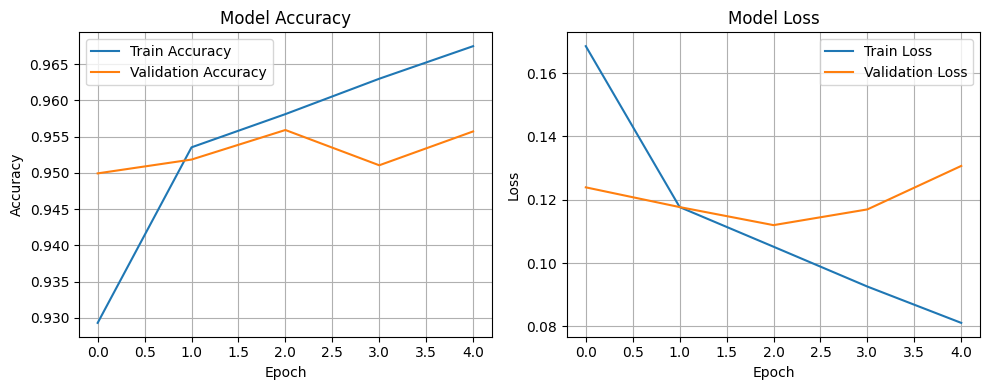

In [102]:
# Î≤°ÌÑ∞, Ï¢åÌëú
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[1]
# Ï†ïÌôïÎèÑ Í∑∏ÎûòÌîÑ
# plt.subplots(1,2,1)
ax[0].plot(history.history['accuracy'], label='Train Accuracy')
ax[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].legend()
ax[0].grid(True)

# ÏÜêÏã§ Í∑∏ÎûòÌîÑ
ax[1].plot(history.history['loss'], label='Train Loss')
ax[1].plot(history.history['val_loss'], label='Validation Loss')
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()

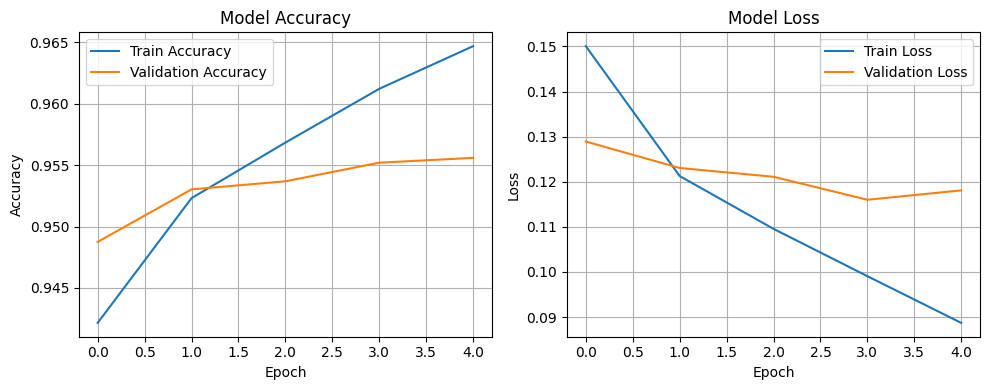

In [153]:
# LSTM
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[1]
# Ï†ïÌôïÎèÑ Í∑∏ÎûòÌîÑ
# plt.subplots(1,2,1)
ax[0].plot(history.history['accuracy'], label='Train Accuracy')
ax[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].legend()
ax[0].grid(True)

# ÏÜêÏã§ Í∑∏ÎûòÌîÑ
ax[1].plot(history.history['loss'], label='Train Loss')
ax[1].plot(history.history['val_loss'], label='Validation Loss')
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()

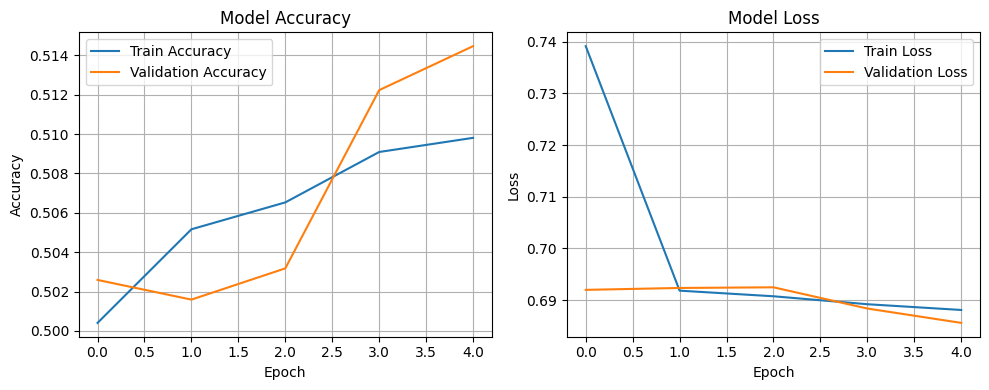

In [35]:
# coords
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[1]
# Ï†ïÌôïÎèÑ Í∑∏ÎûòÌîÑ
# plt.subplots(1,2,1)
ax[0].plot(history.history['accuracy'], label='Train Accuracy')
ax[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].legend()
ax[0].grid(True)

# ÏÜêÏã§ Í∑∏ÎûòÌîÑ
ax[1].plot(history.history['loss'], label='Train Loss')
ax[1].plot(history.history['val_loss'], label='Validation Loss')
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()

# ÏòàÏ∏° ÏãúÌóò

In [36]:
# model.predict()
def predict_model(text):
    sample_processed_text = get_jamo(text)
    sample_vector = vectorize_text(sample_processed_text, fasttext_model)
    if len(sample_vector) == 0:
        return("String data is too short or not available")
    else:
        sample_spaceless_text = replace_space(" ".join(sample_processed_text))
        sample_img = create_sentence_image(sample_spaceless_text, font_path, font_size)
        sample_img = np.array(sample_img)
        
        # Ï¢åÌëú Ï∂îÏ∂ú
        sample_coordinates = get_coordinates(sample_img)
        
        x_lim = sample_img.shape[1]
        y_lim = sample_img.shape[0]
        
        # Ï¢åÌëú Ï†ïÍ∑úÌôî
        sample_std_coords = std_coordinates(sample_coordinates, x_lim, y_lim)
        sample_padded_coords = pad_coords(sample_std_coords, pad_size)
    
        # ÏòàÏ∏°
        sample_padded_vector = pad_vector(sample_vector, 30)

        sample_padded_vector = sample_padded_vector.reshape(1, 30, 100)
        sample_padded_coords = sample_padded_coords.reshape(1, 3000, 2)
        # print(sample_padded_vector.shape)
        # print(sample_padded_coords.shape)
        predict = model.predict([sample_padded_vector, sample_padded_coords], verbose=0)
        return predict

In [70]:
sample = "ÎÖºÎ¨∏ Î¥êÏïºÍ≤†Îã§"
data = predict_model(sample)
print(data)

[[0.02603254]]


# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞

In [129]:
# test df
df_test = df[152000:]

In [130]:
df_test = df_test.reset_index(drop=True)

In [131]:
df_test['label'].value_counts()

label
1    19826
0    18096
Name: count, dtype: int64

In [132]:
df_test

text  label
0              @ÌïúÍµ≠ÏóÑÎßàÏ∞æÍ∏∞ÌòëÌöå ÌïòÎèÑ Ï†ÄÎü¨Îã§Î≥¥Îãà Ï°∞Í±¥Î∞òÏÇ¨Î°ú Ïù¥ÏÑ±ÏùÄ Ïù¥Í±¥ÏïÑÎãåÎåÄ Î™∏ÏùÄ ÎåÄÎ™®Ïßà      0
1                    Í∑∏Î¶ºÏùÑ Ïù¥Î†áÍ≤å ÏïÑÎÇåÏóÜÏù¥ Ïì∏ Ïàò ÏûàÎäî Ïù¥Î∂ÅÏù¥ Î∂ÄÎüΩÏäµÎÑ§Îã§...„Ö†.„Ö†      1
2      8kun ÎîîÎèÑÏä§ Í≥µÍ≤©Ìïú ÏÉàÎÅºÎèÑ Ïû°ÏïÑÎÉàÎã§.\n\nÏùºÎ≤† ÏïÖÏßà ÏπúÏ§ëÌåå Ïö∞ÎÖïÏûêÎçúÎèÑ Í∞ÅÏò§ÌïòÍ≥†...      0
3                                        Ïñ¥Î¶¥Ï†ÅÏóê Ï¶êÍ≤®Î≥∏ Ï∂îÏñµÏùò ÏòÅÌôî      1
4                             Ïä§ÌÜ†Î¶¨Îäî Î≥ÑÎ£®Ïù∏Îç∞... ÌôîÎ†§Ìï®Ïù¥ ÏóÑÏ≤≠ÎÇòÎÑ§Ïöî „Öã„Öã      1
...                                                  ...    ...
37917  ÏõêÏûëÏùÑ ÏùΩÏùÑ Îïå Ïù¥Îü∞ Í±¥ Ï†àÎåÄ ÏòÅÏÉÅÌôîÌïòÍ∏∞ ÌûòÎì§Îã§Í≥† ÏÉùÍ∞ÅÌñàÎäîÎç∞ Î≤§ÌúòÏáºÏùò Ïó∞Í∏∞ÏôÄ ÎçîÎ∂àÏñ¥...      1
37918                                   ÏºÄÏÑùÎåÄ Ïñ¥Íπ® Ïò¨ÎùºÍ∞ÑÍ±∞Î¥êÎùº „Öã„Öã      0
37919  @ÍπÄÏßúÍæ∏ day and night\n\nround the clock\n\nwitho...      0
37920           Î°úÎ≤ÑÌä∏Îã§Ïö∞ÎãàÏ£ºÎãàÏñ¥Î•º Ï¢ãÏïÑÌï¥ÏÑú Î¥§ÎäîÎç∞ÎÑàÎ¨¥Ïû¨Î∞åÍ≤å Î¥§ÎçòÏòÅÌôîÏÉùÍ∞ÅÏóÜÏù¥ Î≥ºÎïå Îî±Ï¢ãÏùå      1
37921                         @ÏùµÎ™Ö_146173 Í∞úÏßÄÎûÑÎ≥ë Î≥ëÏã†Ï¢åÏ¢ÄÏÉàÎÅº„Öã„Öã„Öã„Öã      0

[37922 rows x 2 columns]

In [133]:
from utils.char_dict import char_dict
char_dict

{'Íµ¨': 'Â≠ê',
 'Í∑∏': '„É¶',
 'Í≥†': '„É±',
 'ÎÇ¥': 'LH',
 'Îâò': 'Áàø',
 'Îìú': '‚äÜ',
 'ÎåÄ': 'Î®∏',
 'Îçî': '‡™≤',
 'Îîî': '‡™µ',
 'Îü¨': '‡™∏',
 'Î©ç': 'Îåï',
 'Î¨µ': 'Âè∑',
 'Î∞∞': 'ldH',
 'Ïì∞': '‰∏õ',
 'Ïä§': '‰∫º',
 'Ïàò': '„êÉ',
 'Ïä¥': 'Âêà',
 'Ïä•': '‰ªä',
 'Ïï†': 'OH',
 'ÌÅ¨': '„É®',
 'Ìã∞': 'EL',
 'ÌÉú': 'EH',
 'Ï°∞': '‰∏ï',
 'Î•ò': 'ÂºÇ',
 'Îãà': '‰∏©',
 'Ï¢É': 'Â•Ä',
 'Ï¢Ü': 'Â•Ä',
 'Ïóê': '‡™®‡™æ',
 'Ïñ¥': '‡™®',
 'Ï∞∏': '„ÅàÂç†',
 'ÏïÑ': '√ò–ì',
 'Í∫º': '77„Öì',
 'ÏÉà': '‚àßH',
 'ÎÅº': '77l',
 'Í∑Ä': 'Ïª§',
 'Ìë∏': 'Ëæõ',
 'Ï≠à': 'Ï≠à',
 'Ìåú': 'Á´ô',
 '„Öê': 'H',
 '„ÖÇ': 'ld',
 '„Ñπ': 'Â∑±',
 '„ÖÅ': 'Âè£',
 '„ÖÖ': '‰∫∫',
 '„ÖÜ': '‰ªé',
 '„Öá': 'O',
 '„Öä': '„Åà',
 '„Öã': 'ê®õ',
 '„Ñ≤': 'ÂàÄ',
 '„Öå': 'E',
 '„Öó': '„Öó',
 '„Öè': 'Âçú',
 '„Ö†': 'œÄ',
 '„Ñ¥': '„Åó',
 'y': '„Ñö',
 'Y': '„Ñö',
 'N': '–ò',
 'b': '–™',
 'w': 'œâ',
 'X': '„êÖ',
 'H': '„Öê',
 'L': '„Ñ¥',
 'O': '„Öá',
 'T': '„Öú',
 'g': '9',
 '3': '–ó',
 '6': '–ë'}

In [134]:
def change_char(s):
    new_str = ""
    for i in range(len(s)):
        if s[i] in char_dict:
            new_str += char_dict[s[i]]
        else:
            new_str += s[i]
    return new_str

In [135]:
df_test['text'] = df_test['text'].apply(lambda text: change_char(text))

In [137]:
df_test

text  label
0             @ÌïúÍµ≠ÏóÑÎßàÏ∞æÍ∏∞ÌòëÌöå ÌïòÎèÑ Ï†Ä‡™∏Îã§Î≥¥‰∏© ‰∏ïÍ±¥Î∞òÏÇ¨Î°ú Ïù¥ÏÑ±ÏùÄ Ïù¥Í±¥√ò–ìÎãåÎ®∏ Î™∏ÏùÄ Î®∏Î™®Ïßà      0
1                   „É¶Î¶ºÏùÑ Ïù¥Î†áÍ≤å √ò–ìÎÇåÏóÜÏù¥ Ïì∏ „êÉ ÏûàÎäî Ïù¥Î∂ÅÏù¥ Î∂ÄÎüΩÏäµÎÑ§Îã§...œÄ.œÄ      1
2      8kun ‡™µÎèÑ‰∫º Í≥µÍ≤©Ìïú ‚àßH77lÎèÑ Ïû°√ò–ìÎÉàÎã§.\n\nÏùºÎ≤† ÏïÖÏßà ÏπúÏ§ëÌåå Ïö∞ÎÖïÏûêÎçúÎèÑ ...      0
3                                       ‡™®Î¶¥Ï†Å‡™®‡™æ Ï¶êÍ≤®Î≥∏ Ï∂îÏñµÏùò ÏòÅÌôî      1
4                             ‰∫ºÌÜ†Î¶¨Îäî Î≥ÑÎ£®Ïù∏Îç∞... ÌôîÎ†§Ìï®Ïù¥ ÏóÑÏ≤≠ÎÇòÎÑ§Ïöî ê®õê®õ      1
...                                                  ...    ...
37917  ÏõêÏûëÏùÑ ÏùΩÏùÑ Îïå Ïù¥Îü∞ Í±¥ Ï†àÎ®∏ ÏòÅÏÉÅÌôîÌïòÍ∏∞ ÌûòÎì§Îã§„É± ÏÉùÍ∞ÅÌñàÎäîÎç∞ Î≤§ÌúòÏáºÏùò Ïó∞Í∏∞ÏôÄ ‡™≤Î∂à‡™®...      1
37918                                   ÏºÄÏÑùÎ®∏ ‡™®Íπ® Ïò¨ÎùºÍ∞ÑÍ±∞Î¥êÎùº ê®õê®õ      0
37919  @ÍπÄÏßúÍæ∏ da„Ñö and ni9ht\n\nround the clock\n\nœâitho...      0
37920          Î°úÎ≤ÑÌä∏Îã§Ïö∞‰∏©Ï£º‰∏©‡™®Î•º Ï¢ã√ò–ìÌï¥ÏÑú Î¥§ÎäîÎç∞ÎÑàÎ¨¥Ïû¨Î∞åÍ≤å Î¥§ÎçòÏòÅÌôîÏÉùÍ∞ÅÏóÜÏù¥ Î≥ºÎïå Îî±Ï¢ãÏùå      1
37921                      @ÏùµÎ™Ö_14–ë17–ó Í∞úÏßÄÎûÑÎ≥ë Î≥ëÏã†Ï¢åÏ¢Ä‚àßH77lê®õê®õê®õê®õ      0

[37922 rows x 2 columns]

In [143]:
test_vector_data = []
test_coords_data = []
# img_data = []
test_coords_by_length = []
test_label_list = []

for i in range(len(df_test)):
    text = df_test['text'][i]
    test_processed_text = get_jamo(text)
    test_vector_list = vectorize_text(test_processed_text, fasttext_model)
    if len(test_vector_list) == 0:
        continue
    else:
        test_vector_data.append(test_vector_list)
        # spaceless_text = replace_space(text)
        test_spaceless_text = replace_space(" ".join(test_processed_text))
        test_img = create_sentence_image(test_spaceless_text, font_path, font_size)
        # resized_img = resize_image(img)
        # img_data.append(resized_img)
        test_img = np.array(test_img)
        
        # Ï¢åÌëú Ï∂îÏ∂ú
        test_coordinates = get_coordinates(test_img)
        
        x_lim = test_img.shape[1]
        y_lim = test_img.shape[0]
        
        # Ï¢åÌëú Ï†ïÍ∑úÌôî
        test_std_coords = std_coordinates(test_coordinates, x_lim, y_lim)
        test_coords_by_length.append(test_std_coords.shape[0])
        test_padded_coords = pad_coords(test_std_coords, pad_size)
    
        test_coords_data.append(test_padded_coords)
        test_label_list.append(df_test['label'][i])

    if i % 1000 == 0:
        print(i)
    
print("Preprocess complete")
print(len(test_coords_data))

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
Preprocess complete
37917


In [144]:
# Î≤°ÌÑ∞ Ï†úÎ°úÌå®Îî©
test_padded_vector_data = []
for i in range(len(test_vector_data)):
    test_padded_vector_data.append(pad_vector(test_vector_data[i], 30))
test_padded_vector_data = np.array(test_padded_vector_data)

In [145]:
mod_x_test = test_padded_vector_data[:]
mod_x_test_coords = np.array(test_coords_data)[:]
mod_y_test = np.array(test_label_list)[:]

print(mod_x_test.shape)
print(mod_x_test_coords.shape)
# print(x_test_img.shape)
print(mod_y_test.shape)

(37917, 30, 100)
(37917, 3000, 2)
(37917,)


In [146]:
# Evaluate the model
score = model.evaluate([mod_x_test, mod_x_test_coords], mod_y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

2024-09-28 00:35:19.053075: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1', 80 bytes spill stores, 80 bytes spill loads

2024-09-28 00:35:19.056401: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1', 16 bytes spill stores, 16 bytes spill loads

2024-09-28 00:35:19.185047: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1', 584 bytes spill stores, 396 bytes spill loads



Test loss: 0.1898968666791916
Test accuracy: 0.9354115724563599


In [147]:
# Î≤°ÌÑ∞, Ï¢åÌëú
from sklearn.metrics import f1_score

mod_y_pred = model.predict([mod_x_test, mod_x_test_coords])
mod_y_pred_binary = (mod_y_pred > 0.5).astype(int)
mod_f1 = f1_score(mod_y_test, mod_y_pred_binary)

print("F1 score:", mod_f1)

1185/1185 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 4ms/step
F1 score: 0.937341691185877


In [154]:
# Evaluate LSTM
mod_score = model.evaluate(mod_x_test, mod_y_test, verbose=0)
print("Test loss:", mod_score[0])
print("Test accuracy:", mod_score[1])

Test loss: 0.21583698689937592
Test accuracy: 0.9202204942703247


In [155]:
# LSTM
from sklearn.metrics import f1_score

mod_y_pred = model.predict(mod_x_test)
mod_y_pred_binary = (mod_y_pred > 0.5).astype(int)
mod_f1 = f1_score(mod_y_test, mod_y_pred_binary)

print("F1 score:", mod_f1)

1185/1185 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 1ms/step
F1 score: 0.9221063473670658
